<a href="https://colab.research.google.com/github/Astroid66/IPL-Machine-Learning-Project/blob/main/IPL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [66]:
df1 = pd.read_csv('/content/matches.csv')
df1.shape
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [67]:
df2 = pd.read_csv("/content/deliveries.csv")
df2.shape
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [68]:
df2 = df2.rename(columns={'match_id': 'id'})
df2.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [69]:
data = pd.merge(left = df1, right = df2, on='id', how='right')
data.head() 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [70]:
data.isnull().sum()

id                       0
season               13878
city                 15566
date                 13878
team1                13878
team2                13878
toss_winner          13878
toss_decision        13878
result               13878
dl_applied           13878
winner               14561
win_by_runs          13878
win_by_wickets       13878
player_of_match      14561
venue                13878
umpire1              13878
umpire2              13878
umpire3             150460
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
f

In [71]:
data = data.drop(['umpire3'],axis='columns')
data = data.drop(['dismissal_kind'],axis='columns')
data = data.drop(['fielder'],axis='columns')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,4,0,4,NaN
3,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,2,0,0,0,0,0,2,2,NaN


In [72]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed'],
      dtype='object')

In [73]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['over'] = data['over']+1
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,year
0,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
1,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
2,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,4,0,4,NaN,2008.0
3,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
4,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,2,0,0,0,0,0,2,2,NaN,2008.0


In [74]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,year
0,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
1,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
2,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,4,0,4,NaN,2008.0
3,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,0,NaN,2008.0
4,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,2,0,0,0,0,0,2,2,NaN,2008.0


In [75]:
data.loc[data["player_dismissed"].isnull()==True,"is_wicket"]=0
data.loc[data["player_dismissed"].isnull()==False,"is_wicket"]=1

In [76]:
list1 = data['inning'].unique()

In [77]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
data2.head()

,inning,total_runs
0,100Delhi Daredevils,118
1,100Kings XI Punjab,94
2,101Rajasthan Royals,197
3,101Royal Challengers Bangalore,132
4,102Deccan Chargers,153


In [78]:
data3 = pd.merge(left=data2, right=data, on='inning', how='right')
print(data3.shape)
data3.head()

(150460, 38)


,inning,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,year,is_wicket
0,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
1,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
2,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,4,0,4,NaN,2008.0,0.0
3,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
4,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,2,2,NaN,2008.0,0.0


In [79]:
featureColumns = ['over','ball',
         'batsman_runs','extra_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','venue','batting_team','bowling_team','is_wicket']
print(len(featureColumns))

11


In [80]:
encoder=LabelEncoder()

In [81]:
data3["venue"]=encoder.fit_transform(data3["venue"])
data3["batting_team"]=encoder.fit_transform(data3["batting_team"])
data3["bowling_team"]=encoder.fit_transform(data3["bowling_team"])
data3.head()

,inning,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,year,is_wicket
0,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
1,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
2,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,4,0,4,NaN,2008.0,0.0
3,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,0,0,NaN,2008.0,0.0
4,1Sunrisers Hyderabad,207,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,0,0,0,0,2,2,NaN,2008.0,0.0


In [82]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','total_runs_x','batting_team','bowling_team','venue','is_wicket']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()


    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)

(150460, 38)
(150460, 12)


In [83]:
data3 = container.copy()
container.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,total_runs_x,batting_team,bowling_team,venue,is_wicket,CUMSUM_runs,CUMSUM_wickets
0,2,1,0,0,0,207,13,12,14,0.0,0,0.0
1,2,2,0,0,0,207,13,12,14,0.0,0,0.0
2,2,3,4,0,4,207,13,12,14,0.0,4,0.0
3,2,4,0,0,0,207,13,12,14,0.0,4,0.0
4,2,5,0,2,2,207,13,12,14,0.0,6,0.0


In [84]:
data3['over_cur'] = data3['over'] + data3['ball']/10
data3 = data3[['over_cur',
               'batsman_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','total_runs_x','batting_team','bowling_team','venue','is_wicket']]
data3.astype(float)
data3 = data3.fillna(-99.00)
data3.isnull().values.any()
data3.head()

,over_cur,batsman_runs,total_runs_y,CUMSUM_runs,CUMSUM_wickets,total_runs_x,batting_team,bowling_team,venue,is_wicket
0,2.1,0,0,0,0.0,207,13,12,14,0.0
1,2.2,0,0,0,0.0,207,13,12,14,0.0
2,2.3,4,4,4,0.0,207,13,12,14,0.0
3,2.4,0,0,4,0.0,207,13,12,14,0.0
4,2.5,0,2,6,0.0,207,13,12,14,0.0


In [85]:
def custom_accuracy(y_test,y,tol=10):
    right = 0
    l = len(y)
    for i in range(0,l):
        if(abs(y[i]-y_test[i]) <= tol):
            right += 1
        else:
          print('p',y[i]*300,y_test[i]*300)
    return (right)

In [86]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data3.iloc[:,[0,1,2,3,4,6,7,8,9]].values #Input features
y = data3.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [88]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred1=reg.predict(X_test)
reg.score(X_test, y_test)*100

41.94053014670656

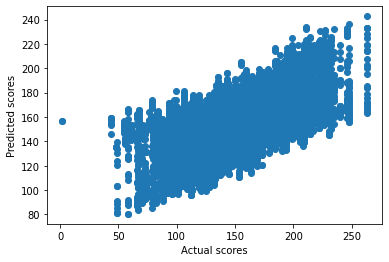

In [90]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()

In [91]:
mae1=mean_absolute_error(y_test,y_pred1)
mae1

16.615758259333997

In [92]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
rmse1

22.409340626351277

In [93]:
y_test = np.asarray(y_test).astype('float32')
y_pred1 = np.asarray(y_pred1).astype('float32')
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred1,10)))

Custom accuracy: 41.842 %


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_features=None)
model =rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
print("Score value:" , score)

Score value: 85.60635733502657


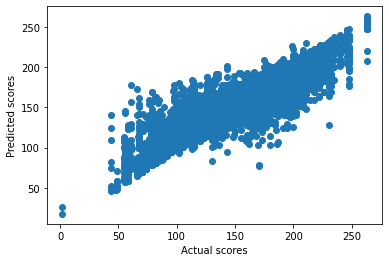

In [95]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()

In [96]:
mae2=mean_absolute_error(y_test,y_pred2)
mae2

7.057842184074658

In [97]:
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
rmse2

11.157782809074122

In [98]:
y_test = np.asarray(y_test).astype('float32')
y_pred2 = np.asarray(y_pred2).astype('float32')
cr1=custom_accuracy2(y_test,y_pred2,10)
cr1

77.68177588727902